<center>
    <h1>
    Voitures (ACP, ACM et AFDM)<br>
    </h1>
</center>

In [1]:
%%html

<!-- styles d'affichage -->
<style>
    .section_div {
        width:70%;
        height:1.5px;
        border:none;
        color:black;
        background-color:black;
        margin: auto;
        margin-top: 0px;
        margin-bottom: 0px;
    }

    .answer {
        color:blue;
    }

    .question {
        color:red;
    }

    .note {
        color:green;
        font-weight: bold;
    }
</style>

In [2]:
#
# assure le reload de src si modifications sont faite
#
%load_ext autoreload
%autoreload 2

In [3]:
#
# import utilitaires
#
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [4]:
#
# import package develope pour le projet
#
import aihelpers.unsupervised as ai
import aihelpers.unsupervised.association_rules as rules

In [5]:
#
# enleve quelques soucis a l'affichage
#
np.set_printoptions(suppress=True, linewidth=200)

# Analyses ACP, ACM, AFDM

- 3 types d’analyse :
    * ACP avec les données continues uniquement
    * ACM avec les données catégorielles
    * AFDM avec l’ensemble des données

**0.1 Charger le fichier « Voitures.csv » en utilisant la librairie Pandas**

In [6]:
voitures_df = pd.read_csv("Voitures.csv", delimiter=";", index_col=0)

display(voitures_df)
print(voitures_df.shape)

,puissance,Longueur,Hauteur,poids,CO2,Origine,Carburant,4X4
Modele,,,,,,,,
Alfasud TI,75,421,149,1217,143,Europe,Diesel,non
Audi 100,138,426,146,1381,142,France,Diesel,non
Simca 1300,204,491,145,1723,223,France,Diesel,non
Citroen GS Club,150,486,158,1735,188,France,Diesel,non
Fiat 132,61,367,147,932,141,France,Essence,non
Lancia Beta,340,502,148,1835,291,Autre,Essence,non
Peugeot 504,102,421,143,1205,168,Europe,Essence,non
Renault 16 TL,202,455,167,1595,237,Autre,Diesel,oui
Renault 30,223,429,154,1595,235,Autre,Essence,non


(10, 8)


<font class="answer">

* 10 individus
* 8 variables (Modele semble être utilisé comme identificateur, donc on n'en tient pas compte, cellule précédante le met comme index)
* Pas de valeurs nulles

**0.2 Vérifier les types de données**

In [7]:
ai.show_types(voitures_df)

Types


,puissance,Longueur,Hauteur,poids,CO2,Origine,Carburant,4X4
Type,int64,int64,int64,int64,int64,object,object,object


<font class="answer">
    
* puissance, Longueur, Hauteur, poids, CO2 sont quantitatives
* Origine, Carburant, 4X4 sont qualitatives

**1. Standardiser les données**

Valeurs propres:
[3.9065 1.1385 0.4282 0.0576 0.0248]

Valeurs propres > 1:
[3.9065 1.1385]

Valeurs propres > 2.3333 (saporta):
[3.9065]

Variance expliquee %:
[70.3 20.5  7.7  1.   0.4]

Variance expliquee cumul. %:
[ 70.3  90.8  98.5  99.6 100. ]



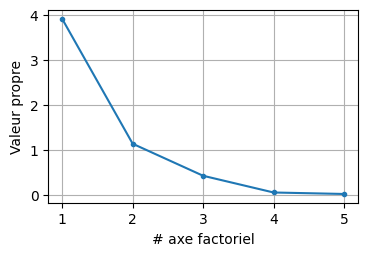

In [8]:
#
# ACP
#
quant_df = voitures_df[["puissance", "Longueur", "Hauteur", "poids", "CO2"]]

quant_std = StandardScaler().fit_transform(quant_df)
quant_std = pd.DataFrame(quant_std,
                         index=quant_df.index,
                         columns=quant_df.columns)

ai.pca_analysis(quant_std)

Valeurs propres:
[0.5573 0.4167 0.3021 0.0573]

Valeurs propres > 0.3333 (1 / p):
[0.5573 0.4167]

Variance expliquee %:
[41.8 31.3 22.7  4.3]

Variance expliquee cumul. %:
[ 41.8  73.   95.7 100. ]



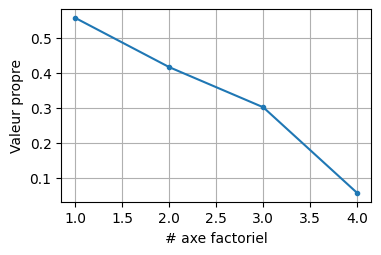

In [9]:
#
# ACM
#
qual_df = voitures_df[ ["Origine", "Carburant", "4X4" ] ]

ai.acm_analysis(qual_df)

<font class="answer">

Le graphe montre un coude à 3 axes pour 95.7% de variance expliquée cumulative. Kaiser en prend 2 pour 73% de variance expliquée cumulative.

AFDM - Toutes les données standardisées


,puissance,Longueur,Hauteur,poids,CO2,Origine_Autre,Origine_Europe,Origine_France,Carburant_Diesel,Carburant_Essence,4X4_non,4X4_oui
Modele,,,,,,,,,,,,
Alfasud TI,-1.103,-0.614,-0.419,-0.989,-1.127,0.000,2.236,0.000,1.291,0.000,1.118,0.000
Audi 100,-0.304,-0.485,-0.733,-0.411,-1.148,0.000,0.000,1.581,1.291,0.000,1.118,0.000
Simca 1300,0.532,1.192,-0.838,0.795,0.558,0.000,0.000,1.581,1.291,0.000,1.118,0.000
Citroen GS Club,-0.152,1.063,0.524,0.837,-0.179,0.000,0.000,1.581,1.291,0.000,1.118,0.000
Fiat 132,-1.280,-2.007,-0.628,-1.993,-1.169,0.000,0.000,1.581,0.000,1.581,1.118,0.000
Lancia Beta,2.256,1.476,-0.524,1.189,1.990,1.581,0.000,0.000,0.000,1.581,1.118,0.000
Peugeot 504,-0.761,-0.614,-1.047,-1.031,-0.600,0.000,2.236,0.000,0.000,1.581,1.118,0.000
Renault 16 TL,0.507,0.263,1.466,0.344,0.853,1.581,0.000,0.000,1.291,0.000,0.000,2.236
Renault 30,0.773,-0.408,0.105,0.344,0.811,1.581,0.000,0.000,0.000,1.581,1.118,0.000


Valeurs propres:
[4.7479 2.3577 1.5986 0.9293 0.1823 0.1272 0.0374 0.0176 0.0022 0.    ]

Valeurs propres > 1:
[4.7479 2.3577 1.5986]

Valeurs propres > 3.2111 (saporta):
[4.7479]

Variance expliquee %:
[47.5 23.6 16.   9.3  1.8  1.3  0.4  0.2  0.   0. ]

Variance expliquee cumul. %:
[ 47.5  71.1  87.   96.3  98.2  99.4  99.8 100.  100.  100. ]



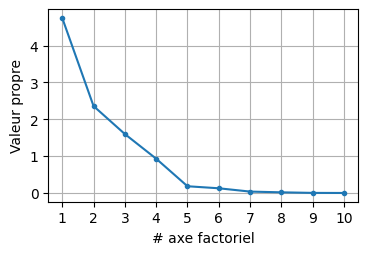

In [10]:
#
# AFDM
#
qual_encoded = pd.get_dummies(qual_df)
qual_encoded_freq = qual_encoded.sum(axis=0)
qual_encoded_freq /= qual_encoded.shape[0]

qual_std = qual_encoded.div( np.sqrt(qual_encoded_freq) )

# recombiner le tout pour l'AFDM
voitures_std = pd.concat([quant_std, qual_std], axis=1)

# validation visuelle
print("AFDM - Toutes les données standardisées")
display(voitures_std.round(3))

ai.pca_analysis(voitures_std)

**3. Valeurs propres?**

<font class="answer">
Voir étapes précédentes

**3. Combien de facteurs à garder?**

In [11]:
#
# ACP Coude et Kaiser (valeur propre > 1)
#

# Voir étapes précédentes

In [12]:
#
# ACM - Kaiser
#
m = qual_encoded.shape[1]
p = qual_df.shape[1]
max_ = m - p
th_ = 1 / p

# eigen_vals_acm = acm.eig_[0]
# eigen_vals_acm_ = eigen_vals_acm[eigen_vals_acm > th_]

print("ACM - max valeurs propres à garder:", max_)
print("ACM - valeurs propres threshold:", round(th_, 4))

#
# ACM - coude
#
# Voir étapes précédentes

ACM - max valeurs propres à garder: 4
ACM - valeurs propres threshold: 0.3333


<font class="answer">
    
* ACM aurait pu garder 3 axes factoriels.

In [13]:
#
# AFDM - critere de Kaiser (valeurs propres > 1)
#
# Voir étapes précédentes

#
# AFDM - coude
#
# Voir étapes précédentes

<font class="answer">
    
* AFDM aurait pu garder 4 axes factoriels.

**4. Visualiser les 10 voitures du fichier sur les axes factoriels adéquats**

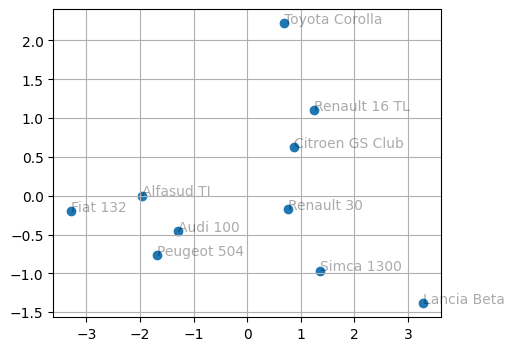

In [14]:
#
# ACP
#
acp_ = ai.pca_init(quant_std, 2)
acp_.mapping_row(1, 2)

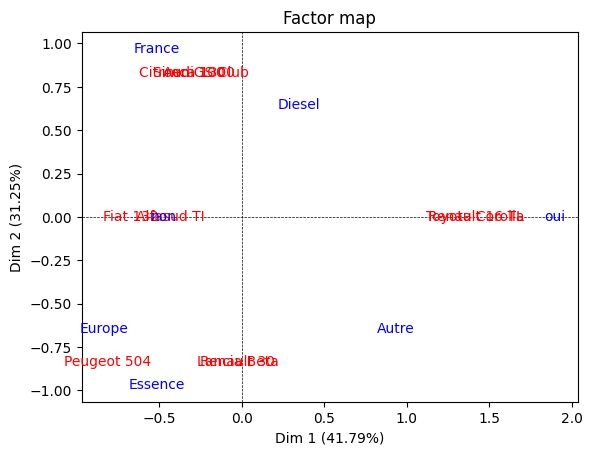

In [15]:
#
# ACM
#
acm_ = ai.acm_init(qual_df, 2)
acm_.mapping(1, 2)

<font class="answer">

Les chevauchements:
* Renault 16 TL et Toyota Corolla sont près de 4x4_oui
* Alfasud TI et Fiat 132 sont près de 4x4_non
* Simca 1300 et Citroen GS Club prochent de Origine_France et Carburant_Diesel
* Lancia Beta et Renault 30 (Peugeot 504 ish) prochent de Origine_Europe et Carburant_Essence

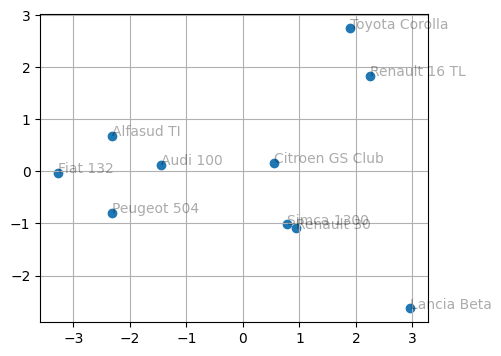

Dim 1 (47.48%)
Dim 2 (23.58%)


In [16]:
#
# AFDM
#

from pprint import pprint

# afdm a garde 3 valeurs propres, comme nous n'avons 
# qu'une visualisation 2D, on garde 2 coordonnees
voitures_projected = ai.pca_init(voitures_std, 2)
voitures_projected.mapping_row(1, 2)

dim1 = voitures_projected.explained_variance_ratio_[0] * 100
dim2 = voitures_projected.explained_variance_ratio_[1] * 100

print(f"Dim 1 ({round(dim1, 2)}%)")
print(f"Dim 2 ({round(dim2, 2)}%)")